# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
#lat_lngs = []
#cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
    #city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    #if city not in cities:
        #cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)

# DF for randomly generated lat and long
selected_cities = pd.DataFrame()
selected_cities['random_latitude'] = [np.random.uniform(-90,90) for x in range(1500)]
selected_cities['random_longitude'] = [np.random.uniform(-180, 180) for x in range(1500)]

# add closest city and country column
selected_cities['nearest_city'] = ""
selected_cities['country'] = ""

#find and add closest city and country code
for index, row in selected_cities.iterrows():
    lat = row['random_latitude']
    lng = row['random_longitude']
    selected_cities.set_value(index, 'nearest_city', citipy.nearest_city(lat, lng).city_name)
    selected_cities.set_value(index, 'country', citipy.nearest_city(lat, lng).country_code)


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [3]:
selected_cities.head()

,random_latitude,random_longitude,nearest_city,country
0,4.702835,-132.857427,atuona,pf
1,-70.187681,10.271577,hermanus,za
2,-79.337206,-15.554877,cape town,za
3,-34.027904,-89.958467,lebu,cl
4,49.077629,149.650345,vostok,ru


In [12]:
selected_cities = selected_cities.drop_duplicates(['nearest_city', 'country'])
selected_cities = selected_cities.dropna()
len(selected_cities['nearest_city'].value_counts())

599

In [13]:
selected_cities = selected_cities.rename(columns = {'nearest_city': 'city',
                                                   'random_latitude':'Latitude',
                                                   'random_longitude': 'Longitude'
                                                   })

In [14]:
selected_cities.head()

,Latitude,Longitude,city,country
0,63.685268,131.658442,borogontsy,ru
1,0.927148,-173.418732,saleaula,ws
2,-87.224925,-7.965363,hermanus,za
3,-17.634127,-130.165398,rikitea,pf
4,-57.386115,79.041553,souillac,mu


In [15]:
#Counter
count = 0
# setting up additional columns to hold information
selected_cities['Temperature'] = ""
selected_cities['Humidity'] = ""
selected_cities['Cloudiness'] = ""
selected_cities['Wind Speed'] = ""
selected_cities.head()

,Latitude,Longitude,city,country,Temperature,Humidity,Cloudiness,Wind Speed
0,63.685268,131.658442,borogontsy,ru,,,,
1,0.927148,-173.418732,saleaula,ws,,,,
2,-87.224925,-7.965363,hermanus,za,,,,
3,-17.634127,-130.165398,rikitea,pf,,,,
4,-57.386115,79.041553,souillac,mu,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Loop through and get the weather data using the Open Weather API.
print("Beginning Data Retrieval")
print("-----------------------------------")
for index, row in selected_cities.iterrows():
  #Open weather url.
    url = "https://api.openweathermap.org/data/2.5/weather?"
    #units = "Imperial"
    query_url = url + "lat=" + str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + api_key #+ "&units=" + units   
    
    print(f"Processing Record {count} of Set 1500 | {row['city']}")
    print(query_url)
    count += 1
    weather = requests.get(query_url).json()
    #print(weather)
    try:
        temperature = weather["main"]["temp"]
        humidity = weather["main"]["humidity"]
        cloudiness = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", temperature)
        selected_cities.set_value(index,"Humidity", humidity)
        selected_cities.set_value(index,"Cloudiness", cloudiness)
        selected_cities.set_value(index,"Wind Speed", wind_speed)
        
    except KeyError: 'main'
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 0 of Set 1500 | borogontsy
https://api.openweathermap.org/data/2.5/weather?lat=63.685268159109256&lon=131.6584416123331&appid=dc1c586806d978a8d2627273e646d786
Processing Record 1 of Set 1500 | saleaula
https://api.openweathermap.org/data/2.5/weather?lat=0.9271478935565796&lon=-173.41873229439028&appid=dc1c586806d978a8d2627273e646d786


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing Record 2 of Set 1500 | hermanus
https://api.openweathermap.org/data/2.5/weather?lat=-87.22492545819&lon=-7.965362968303992&appid=dc1c586806d978a8d2627273e646d786
Processing Record 3 of Set 1500 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-17.634127365991986&lon=-130.16539819224883&appid=dc1c586806d978a8d2627273e646d786
Processing Record 4 of Set 1500 | souillac
https://api.openweathermap.org/data/2.5/weather?lat=-57.38611546044435&lon=79.04155298789016&appid=dc1c586806d978a8d2627273e646d786
Processing Record 5 of Set 1500 | saint anthony
https://api.openweathermap.org/data/2.5/weather?lat=51.48513100337533&lon=-53.275944001873725&appid=dc1c586806d978a8d2627273e646d786
Processing Record 6 of Set 1500 | nizhneyansk
https://api.openweathermap.org/data/2.5/weather?lat=77.26276832711639&lon=140.2154414824684&appid=dc1c586806d978a8d2627273e646d786
Processing Record 7 of Set 1500 | bluff
https://api.openweathermap.org/data/2.5/weather?lat=-52.244679070865175&lon=1

Processing Record 49 of Set 1500 | grand baie
https://api.openweathermap.org/data/2.5/weather?lat=-19.502229606648513&lon=56.81780447166028&appid=dc1c586806d978a8d2627273e646d786
Processing Record 50 of Set 1500 | calama
https://api.openweathermap.org/data/2.5/weather?lat=-21.617232767041457&lon=-68.66793231809766&appid=dc1c586806d978a8d2627273e646d786
Processing Record 51 of Set 1500 | shaturtorf
https://api.openweathermap.org/data/2.5/weather?lat=55.54125372502662&lon=39.34538283995502&appid=dc1c586806d978a8d2627273e646d786
Processing Record 52 of Set 1500 | khatanga
https://api.openweathermap.org/data/2.5/weather?lat=73.94080485591337&lon=105.44341613278795&appid=dc1c586806d978a8d2627273e646d786
Processing Record 53 of Set 1500 | zabol
https://api.openweathermap.org/data/2.5/weather?lat=30.7720104844082&lon=60.42044643397895&appid=dc1c586806d978a8d2627273e646d786
Processing Record 54 of Set 1500 | cape town
https://api.openweathermap.org/data/2.5/weather?lat=-46.715029450007414&lon=

Processing Record 97 of Set 1500 | quatre cocos
https://api.openweathermap.org/data/2.5/weather?lat=-15.016634377482802&lon=69.63916790128727&appid=dc1c586806d978a8d2627273e646d786
Processing Record 98 of Set 1500 | yenagoa
https://api.openweathermap.org/data/2.5/weather?lat=3.3719046808065514&lon=4.546179622495288&appid=dc1c586806d978a8d2627273e646d786
Processing Record 99 of Set 1500 | faya
https://api.openweathermap.org/data/2.5/weather?lat=20.017768256802597&lon=22.831761157645445&appid=dc1c586806d978a8d2627273e646d786
Processing Record 100 of Set 1500 | nome
https://api.openweathermap.org/data/2.5/weather?lat=74.37968679484746&lon=-166.21593349348768&appid=dc1c586806d978a8d2627273e646d786
Processing Record 101 of Set 1500 | puerto del rosario
https://api.openweathermap.org/data/2.5/weather?lat=25.158306160205115&lon=-11.930130995387202&appid=dc1c586806d978a8d2627273e646d786
Processing Record 102 of Set 1500 | te anau
https://api.openweathermap.org/data/2.5/weather?lat=-41.59808377

Processing Record 144 of Set 1500 | samarai
https://api.openweathermap.org/data/2.5/weather?lat=-16.267609193000013&lon=155.09722017099733&appid=dc1c586806d978a8d2627273e646d786
Processing Record 145 of Set 1500 | teguldet
https://api.openweathermap.org/data/2.5/weather?lat=58.078449359298844&lon=87.54550934820907&appid=dc1c586806d978a8d2627273e646d786
Processing Record 146 of Set 1500 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=-2.5776037646215&lon=-104.15409345839174&appid=dc1c586806d978a8d2627273e646d786
Processing Record 147 of Set 1500 | sao filipe
https://api.openweathermap.org/data/2.5/weather?lat=5.073541072469595&lon=-26.986539924004802&appid=dc1c586806d978a8d2627273e646d786
Processing Record 148 of Set 1500 | shchigry
https://api.openweathermap.org/data/2.5/weather?lat=51.61304495873836&lon=36.84309038023949&appid=dc1c586806d978a8d2627273e646d786
Processing Record 149 of Set 1500 | attawapiskat
https://api.openweathermap.org/data/2.5/weather?lat=56.5234

Processing Record 192 of Set 1500 | salaya
https://api.openweathermap.org/data/2.5/weather?lat=22.358747093131342&lon=69.43328127447401&appid=dc1c586806d978a8d2627273e646d786
Processing Record 193 of Set 1500 | sayula
https://api.openweathermap.org/data/2.5/weather?lat=17.894396742497037&lon=-94.98253258752679&appid=dc1c586806d978a8d2627273e646d786
Processing Record 194 of Set 1500 | carnarvon
https://api.openweathermap.org/data/2.5/weather?lat=-26.678268053291376&lon=89.17728879578351&appid=dc1c586806d978a8d2627273e646d786
Processing Record 195 of Set 1500 | antofagasta
https://api.openweathermap.org/data/2.5/weather?lat=-24.28250510436507&lon=-69.56323227374361&appid=dc1c586806d978a8d2627273e646d786
Processing Record 196 of Set 1500 | tsihombe
https://api.openweathermap.org/data/2.5/weather?lat=-40.93900507882008&lon=44.34646333708312&appid=dc1c586806d978a8d2627273e646d786
Processing Record 197 of Set 1500 | ushtobe
https://api.openweathermap.org/data/2.5/weather?lat=46.0049687651942

Processing Record 239 of Set 1500 | gombong
https://api.openweathermap.org/data/2.5/weather?lat=-9.23657961881706&lon=108.91231760544218&appid=dc1c586806d978a8d2627273e646d786
Processing Record 240 of Set 1500 | north bend
https://api.openweathermap.org/data/2.5/weather?lat=42.55768863005056&lon=-130.74014156713028&appid=dc1c586806d978a8d2627273e646d786
Processing Record 241 of Set 1500 | aklavik
https://api.openweathermap.org/data/2.5/weather?lat=72.75013603711005&lon=-142.6884660216971&appid=dc1c586806d978a8d2627273e646d786
Processing Record 242 of Set 1500 | castro
https://api.openweathermap.org/data/2.5/weather?lat=-42.48112818268585&lon=-81.49216880045043&appid=dc1c586806d978a8d2627273e646d786
Processing Record 243 of Set 1500 | labutta
https://api.openweathermap.org/data/2.5/weather?lat=14.57341669660019&lon=93.00578339099059&appid=dc1c586806d978a8d2627273e646d786
Processing Record 244 of Set 1500 | coquimbo
https://api.openweathermap.org/data/2.5/weather?lat=-29.282348777304826&

Processing Record 287 of Set 1500 | pimenta bueno
https://api.openweathermap.org/data/2.5/weather?lat=-10.548463170474534&lon=-60.33059180194772&appid=dc1c586806d978a8d2627273e646d786
Processing Record 288 of Set 1500 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?lat=81.44416187479126&lon=22.356842405039515&appid=dc1c586806d978a8d2627273e646d786
Processing Record 289 of Set 1500 | husavik
https://api.openweathermap.org/data/2.5/weather?lat=74.39909739047638&lon=-10.007382684899312&appid=dc1c586806d978a8d2627273e646d786
Processing Record 290 of Set 1500 | stellenbosch
https://api.openweathermap.org/data/2.5/weather?lat=-33.98713043993151&lon=18.847803911864276&appid=dc1c586806d978a8d2627273e646d786
Processing Record 291 of Set 1500 | la solana
https://api.openweathermap.org/data/2.5/weather?lat=38.8606470246294&lon=-3.030959685848984&appid=dc1c586806d978a8d2627273e646d786
Processing Record 292 of Set 1500 | meulaboh
https://api.openweathermap.org/data/2.5/weather?lat=-4

Processing Record 335 of Set 1500 | west wendover
https://api.openweathermap.org/data/2.5/weather?lat=39.374790002662536&lon=-114.59930969117619&appid=dc1c586806d978a8d2627273e646d786
Processing Record 336 of Set 1500 | eskisehir
https://api.openweathermap.org/data/2.5/weather?lat=39.76312735490819&lon=30.66035033274136&appid=dc1c586806d978a8d2627273e646d786
Processing Record 337 of Set 1500 | kormilovka
https://api.openweathermap.org/data/2.5/weather?lat=54.8767608072919&lon=74.07368087801959&appid=dc1c586806d978a8d2627273e646d786
Processing Record 338 of Set 1500 | cabedelo
https://api.openweathermap.org/data/2.5/weather?lat=-5.066671387734758&lon=-28.21265898508662&appid=dc1c586806d978a8d2627273e646d786
Processing Record 339 of Set 1500 | kiama
https://api.openweathermap.org/data/2.5/weather?lat=-36.94184841388119&lon=155.98015734616303&appid=dc1c586806d978a8d2627273e646d786
Processing Record 340 of Set 1500 | grand gaube
https://api.openweathermap.org/data/2.5/weather?lat=-14.70276

Processing Record 383 of Set 1500 | cayenne
https://api.openweathermap.org/data/2.5/weather?lat=10.19684328115369&lon=-46.65604499660853&appid=dc1c586806d978a8d2627273e646d786
Processing Record 384 of Set 1500 | verkhnevilyuysk
https://api.openweathermap.org/data/2.5/weather?lat=62.68245410684551&lon=119.87974863804556&appid=dc1c586806d978a8d2627273e646d786
Processing Record 385 of Set 1500 | ngukurr
https://api.openweathermap.org/data/2.5/weather?lat=-16.473221995268545&lon=135.1958747015039&appid=dc1c586806d978a8d2627273e646d786
Processing Record 386 of Set 1500 | tanout
https://api.openweathermap.org/data/2.5/weather?lat=15.135153737026755&lon=9.026576018232248&appid=dc1c586806d978a8d2627273e646d786
Processing Record 387 of Set 1500 | awjilah
https://api.openweathermap.org/data/2.5/weather?lat=24.67227994460096&lon=19.80850935158307&appid=dc1c586806d978a8d2627273e646d786
Processing Record 388 of Set 1500 | berdigestyakh
https://api.openweathermap.org/data/2.5/weather?lat=62.18233193

Processing Record 430 of Set 1500 | padang
https://api.openweathermap.org/data/2.5/weather?lat=-2.2693175166307213&lon=95.33383474835921&appid=dc1c586806d978a8d2627273e646d786
Processing Record 431 of Set 1500 | prince rupert
https://api.openweathermap.org/data/2.5/weather?lat=48.934944790092544&lon=-135.3682849798029&appid=dc1c586806d978a8d2627273e646d786
Processing Record 432 of Set 1500 | akdepe
https://api.openweathermap.org/data/2.5/weather?lat=42.16700742903109&lon=58.35813337769068&appid=dc1c586806d978a8d2627273e646d786
Processing Record 433 of Set 1500 | kokuy
https://api.openweathermap.org/data/2.5/weather?lat=52.28164233810756&lon=117.50655125204213&appid=dc1c586806d978a8d2627273e646d786
Processing Record 434 of Set 1500 | muzhi
https://api.openweathermap.org/data/2.5/weather?lat=64.34214857428915&lon=65.98237156957438&appid=dc1c586806d978a8d2627273e646d786
Processing Record 435 of Set 1500 | pevek
https://api.openweathermap.org/data/2.5/weather?lat=76.20781658949932&lon=172.

Processing Record 478 of Set 1500 | temaraia
https://api.openweathermap.org/data/2.5/weather?lat=-2.737605771119746&lon=171.078620000233&appid=dc1c586806d978a8d2627273e646d786
Processing Record 479 of Set 1500 | saint-leu
https://api.openweathermap.org/data/2.5/weather?lat=-21.15421245326445&lon=54.64143032613069&appid=dc1c586806d978a8d2627273e646d786
Processing Record 480 of Set 1500 | richards bay
https://api.openweathermap.org/data/2.5/weather?lat=-34.35536266618371&lon=38.302744393799316&appid=dc1c586806d978a8d2627273e646d786
Processing Record 481 of Set 1500 | bow island
https://api.openweathermap.org/data/2.5/weather?lat=48.71178730504178&lon=-110.9728384107343&appid=dc1c586806d978a8d2627273e646d786
Processing Record 482 of Set 1500 | zeya
https://api.openweathermap.org/data/2.5/weather?lat=54.302434295612954&lon=127.58381821899746&appid=dc1c586806d978a8d2627273e646d786
Processing Record 483 of Set 1500 | oranjemund
https://api.openweathermap.org/data/2.5/weather?lat=-30.14824873

Processing Record 526 of Set 1500 | kushima
https://api.openweathermap.org/data/2.5/weather?lat=29.44171471548448&lon=131.6721641324712&appid=dc1c586806d978a8d2627273e646d786
Processing Record 527 of Set 1500 | constitucion
https://api.openweathermap.org/data/2.5/weather?lat=17.190772951968313&lon=-123.27259882999182&appid=dc1c586806d978a8d2627273e646d786
Processing Record 528 of Set 1500 | gurgan
https://api.openweathermap.org/data/2.5/weather?lat=40.29904244480912&lon=51.711909885185634&appid=dc1c586806d978a8d2627273e646d786
Processing Record 529 of Set 1500 | rocha
https://api.openweathermap.org/data/2.5/weather?lat=-46.49521426962826&lon=-44.750919707541016&appid=dc1c586806d978a8d2627273e646d786
Processing Record 530 of Set 1500 | ksenyevka
https://api.openweathermap.org/data/2.5/weather?lat=53.21755158598006&lon=118.60718930198254&appid=dc1c586806d978a8d2627273e646d786
Processing Record 531 of Set 1500 | vaitape
https://api.openweathermap.org/data/2.5/weather?lat=-17.4274833343634

Processing Record 572 of Set 1500 | macklin
https://api.openweathermap.org/data/2.5/weather?lat=52.469485989326984&lon=-109.83501995326628&appid=dc1c586806d978a8d2627273e646d786
Processing Record 573 of Set 1500 | cairns
https://api.openweathermap.org/data/2.5/weather?lat=-14.538349172790305&lon=148.83388766265995&appid=dc1c586806d978a8d2627273e646d786
Processing Record 574 of Set 1500 | gravdal
https://api.openweathermap.org/data/2.5/weather?lat=72.31855395473497&lon=12.189357824366567&appid=dc1c586806d978a8d2627273e646d786
Processing Record 575 of Set 1500 | greenville
https://api.openweathermap.org/data/2.5/weather?lat=33.354335131921374&lon=-96.15490748890821&appid=dc1c586806d978a8d2627273e646d786
Processing Record 576 of Set 1500 | coos bay
https://api.openweathermap.org/data/2.5/weather?lat=42.982690584982265&lon=-126.13049037468255&appid=dc1c586806d978a8d2627273e646d786
Processing Record 577 of Set 1500 | gorin
https://api.openweathermap.org/data/2.5/weather?lat=51.8771956158620

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
selected_cities.head()
selected_cities.to_csv("WorldWeatherData.csv", index=False)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

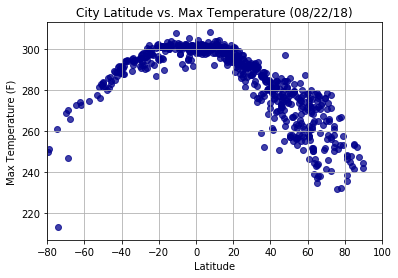

In [17]:

# Temperature (F) vs. Latitude
plt.scatter(selected_cities['Latitude'], selected_cities['Temperature'], marker='o', facecolor='darkblue',alpha = 0.75)

plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-80,100)
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

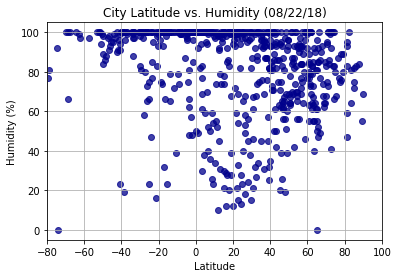

In [18]:
# Humidity (%) vs. Latitude
plt.scatter(selected_cities['Latitude'],selected_cities['Humidity'],marker='o',facecolor='darkblue', alpha = 0.75)

plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

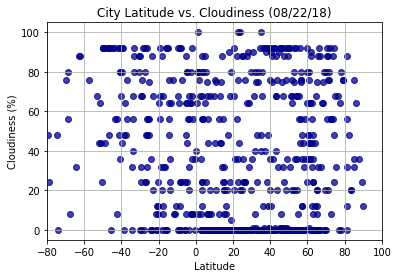

In [19]:
# Cloudiness (%) vs. Latitude
plt.scatter(selected_cities['Latitude'],selected_cities['Cloudiness'],marker='o',facecolor='darkblue', alpha = 0.75)

plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

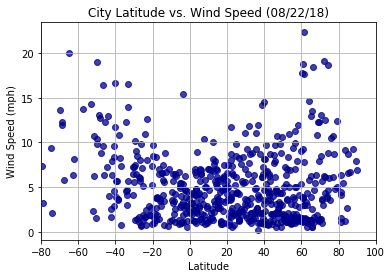

In [21]:

# Wind Speed (mph) vs. Latitude
plt.scatter(selected_cities['Latitude'],selected_cities['Wind Speed'],marker='o',facecolor='darkblue', alpha = 0.75)

plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim(-80,100)
plt.savefig("Wind_Speed.png")
plt.show()